In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.metrics import accuracy_score


In [8]:
df=pd.read_csv("twitter.csv")
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [9]:
print(df.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [13]:
X = df['tweet']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
vocab_size = 10000  
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [17]:
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

embedding_dim = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n Test Accuracy: {accuracy:.4f}")

Epoch 1/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9245 - loss: 0.2217 - val_accuracy: 0.9521 - val_loss: 0.1417
Epoch 2/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9782 - loss: 0.0808 - val_accuracy: 0.9550 - val_loss: 0.1462
Epoch 3/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9935 - loss: 0.0435 - val_accuracy: 0.9509 - val_loss: 0.1787
Epoch 4/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9983 - loss: 0.0085 - val_accuracy: 0.9552 - val_loss: 0.2196
Epoch 5/5
640/640 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9992 - loss: 0.0035 - val_accuracy: 0.9507 - val_loss: 0.2448
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

 Test Accuracy: 0.9517


In [21]:
embedding_layer = model.layers[0]
embedding_weights = embedding_layer.get_weights()[0] 

word_index = tokenizer.word_index
inverse_word_index = {v: k for k, v in word_index.items()}

In [25]:
words_to_visualize = 200  
words = []
embeddings = []

for i in range(1, words_to_visualize + 1):
    if i in inverse_word_index:
        words.append(inverse_word_index[i])
        embeddings.append(embedding_weights[i])

embeddings = np.array(embeddings)

In [27]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne.fit_transform(embeddings)

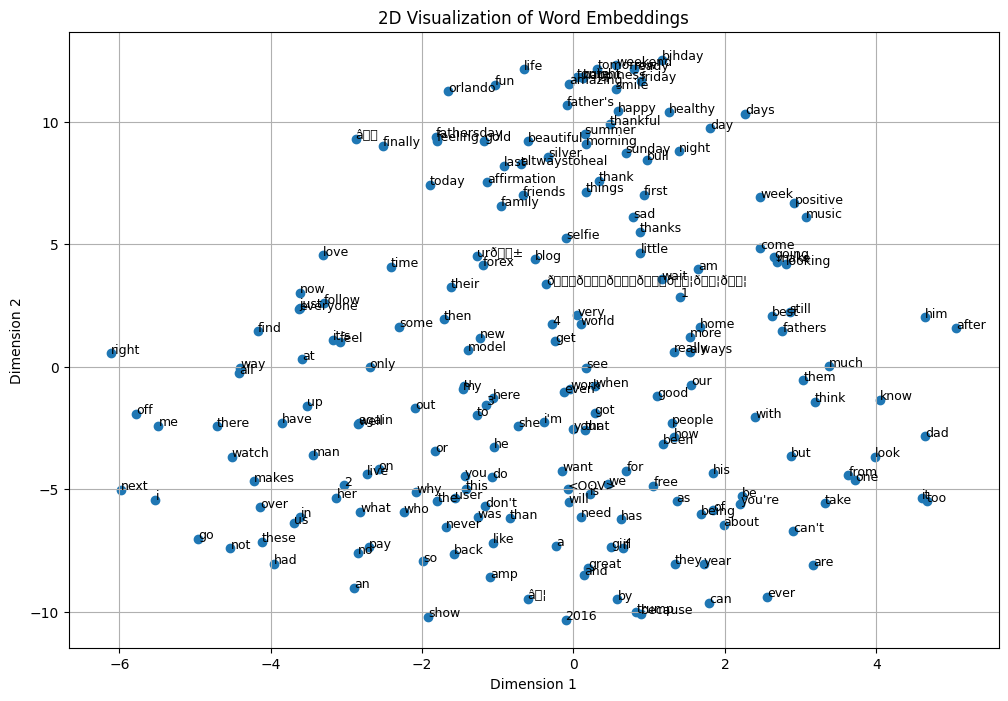

In [31]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]), fontsize=9)

plt.title('2D Visualization of Word Embeddings')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()